<a href="https://colab.research.google.com/github/ouguro3/Project/blob/main/%EB%B2%95%EC%95%88%EB%8D%B0%EC%9D%B4%ED%84%B0_%EC%A0%84%EC%B2%98%EB%A6%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd

In [ ]:
data1 = pd.read_csv('./drive/MyDrive/data/통과 법안.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (2,5,17) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
data1

,AGE,ANNOUNCE_DT,BDG_PRESENT_DT,BDG_PROC_DT,BDG_SUBMIT_DT,BILL_ID,BILL_KIND,BILL_NAME,BILL_NO,BLANK_TCNT,COMMITTEE_NM,COMMITTEE_PRESENT_DT,COMMITTEE_PROC_DT,COMMITTEE_SUBMIT_DT,CURR_TRANS_DT,LAW_PRESENT_DT,LAW_PROC_DT,LAW_SUBMIT_DT,LINK_URL,NO_TCNT,PROC_RESULT_CD,PROPOSER,PROPOSER_KIND_CD,PROPOSE_DT,RGS_PRESENT_DT,RGS_PROC_DT,VOTE_TCNT,YES_TCNT
0,21,NaN,NaN,NaN,NaN,PRC_A2Q0T0X9B2P4F0M9N3P8K5S9I7K5N9,기타,본회의 의결을 요하는 국정감사대상기관 승인의 건(과학기술정보방송통신위원장),2104197,NaN,과학기술정보방송통신위원회,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://likms.assembly.go.kr/bill/billDetail.d...,NaN,원안가결,과학기술정보방송통신위원장,위원장,2020-09-24,2020-09-24,2020-09-24,NaN,NaN
1,21,NaN,NaN,NaN,NaN,PRC_W2L0P0M9C2X4P1E3A2N6C4B7T7K5M0,기타,과학기술정보방송통신위원장(박광온) 사임의 건(박광온의원),2104196,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://likms.assembly.go.kr/bill/billDetail.d...,NaN,원안가결,박광온의원,의원,2020-09-24,2020-09-24,2020-09-24,NaN,NaN
2,21,NaN,NaN,NaN,NaN,PRC_B2C0D0H9S2D4W1P3U3V0E2P2Y0B0R9,기타,보건복지위원장(한정애) 사임의 건(한정애의원),2104195,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://likms.assembly.go.kr/bill/billDetail.d...,NaN,원안가결,한정애의원,의원,2020-09-24,2020-09-24,2020-09-24,NaN,NaN
3,21,NaN,NaN,NaN,NaN,PRC_O2T0Q0J9B2M3U2U0L0E0W1G5F6O7A5,기타,본회의 의결을 요하는 국정감사대상기관 승인의 건(국회운영위원장),2104193,NaN,국회운영위원회,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://likms.assembly.go.kr/bill/billDetail.d...,NaN,원안가결,국회운영위원장,위원장,2020-09-24,2020-09-24,2020-09-24,NaN,NaN
4,21,NaN,NaN,NaN,NaN,PRC_E2O0V0L9L2C1E1Q3W0E4Y2A2W8I9P6,기타,2020년도 국정감사 정기회 기간 중 실시의 건(국회운영위원장),2104192,NaN,국회운영위원회,2020-09-24,2020-09-24,NaN,NaN,NaN,NaN,NaN,https://likms.assembly.go.kr/bill/billDetail.d...,NaN,원안가결,국회운영위원장,위원장,2020-09-24,2020-09-24,2020-09-24,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68525,1,1948-07-17,NaN,NaN,NaN,6,기타,헌법안(헌법기초위원장),10007,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://likms.assembly.go.kr/bill/billDetail.d...,NaN,수정가결,헌법기초위원장,위원장,1948-06-23,NaN,1948-07-12,NaN,NaN
68526,1,1948-10-02,NaN,NaN,NaN,5,법률안,국회법안(국회법기초특별위원장),10006,NaN,NaN,NaN,NaN,NaN,1948-09-18,NaN,NaN,NaN,https://likms.assembly.go.kr/bill/billDetail.d...,NaN,원안가결,국회법기초특별위원장,NaN,1948-06-08,NaN,1948-06-10,NaN,NaN
68527,1,NaN,NaN,NaN,NaN,3,법률안,지방자치조직법안(내무위원장),10004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://likms.assembly.go.kr/bill/billDetail.d...,NaN,회기불계속폐기,내무위원장,NaN,1948-05-31,NaN,1948-12-18,NaN,NaN
68528,1,1948-09-22,NaN,NaN,NaN,2,법률안,반민족행위처벌법안(특별법기초위원장),10003,NaN,특별법기초위원회,NaN,1948-08-14,NaN,NaN,NaN,NaN,NaN,https://likms.assembly.go.kr/bill/billDetail.d...,NaN,수정가결,특별법기초위원장,NaN,1947-08-16,NaN,1948-09-07,NaN,NaN


In [ ]:
data1.columns

Index(['AGE', 'ANNOUNCE_DT', 'BDG_PRESENT_DT', 'BDG_PROC_DT', 'BDG_SUBMIT_DT',
       'BILL_ID', 'BILL_KIND', 'BILL_NAME', 'BILL_NO', 'BLANK_TCNT',
       'COMMITTEE_NM', 'COMMITTEE_PRESENT_DT', 'COMMITTEE_PROC_DT',
       'COMMITTEE_SUBMIT_DT', 'CURR_TRANS_DT', 'LAW_PRESENT_DT', 'LAW_PROC_DT',
       'LAW_SUBMIT_DT', 'LINK_URL', 'NO_TCNT', 'PROC_RESULT_CD', 'PROPOSER',
       'PROPOSER_KIND_CD', 'PROPOSE_DT', 'RGS_PRESENT_DT', 'RGS_PROC_DT',
       'VOTE_TCNT', 'YES_TCNT'],
      dtype='object')

필요없는 column들 죄다 제거

In [ ]:
data1.drop(['ANNOUNCE_DT', 'BDG_PRESENT_DT', 'BDG_PROC_DT', 'BDG_SUBMIT_DT',
            'BILL_ID', 'BILL_KIND','BLANK_TCNT','COMMITTEE_PRESENT_DT', 'COMMITTEE_PROC_DT',
            'COMMITTEE_SUBMIT_DT','CURR_TRANS_DT', 'LAW_PRESENT_DT', 'LAW_PROC_DT',
            'LAW_SUBMIT_DT', 'LINK_URL', 'NO_TCNT','PROPOSE_DT', 'RGS_PRESENT_DT',
            'VOTE_TCNT', 'YES_TCNT','COMMITTEE_NM','PROPOSER','PROPOSER_KIND_CD'], axis=1, inplace=True)

In [ ]:
data1

,AGE,BILL_NAME,BILL_NO,PROC_RESULT_CD,RGS_PROC_DT
0,21,본회의 의결을 요하는 국정감사대상기관 승인의 건(과학기술정보방송통신위원장),2104197,원안가결,2020-09-24
1,21,과학기술정보방송통신위원장(박광온) 사임의 건(박광온의원),2104196,원안가결,2020-09-24
2,21,보건복지위원장(한정애) 사임의 건(한정애의원),2104195,원안가결,2020-09-24
3,21,본회의 의결을 요하는 국정감사대상기관 승인의 건(국회운영위원장),2104193,원안가결,2020-09-24
4,21,2020년도 국정감사 정기회 기간 중 실시의 건(국회운영위원장),2104192,원안가결,2020-09-24
...,...,...,...,...,...
68525,1,헌법안(헌법기초위원장),10007,수정가결,1948-07-12
68526,1,국회법안(국회법기초특별위원장),10006,원안가결,1948-06-10
68527,1,지방자치조직법안(내무위원장),10004,회기불계속폐기,1948-12-18
68528,1,반민족행위처벌법안(특별법기초위원장),10003,수정가결,1948-09-07


column명 알기쉽게 변경

In [ ]:
data1.columns = ['대수','의안명','의안번호','의결결과','본회의심의_의결일']

In [ ]:
data1

,대수,의안명,의안번호,의결결과,본회의심의_의결일
0,21,본회의 의결을 요하는 국정감사대상기관 승인의 건(과학기술정보방송통신위원장),2104197,원안가결,2020-09-24
1,21,과학기술정보방송통신위원장(박광온) 사임의 건(박광온의원),2104196,원안가결,2020-09-24
2,21,보건복지위원장(한정애) 사임의 건(한정애의원),2104195,원안가결,2020-09-24
3,21,본회의 의결을 요하는 국정감사대상기관 승인의 건(국회운영위원장),2104193,원안가결,2020-09-24
4,21,2020년도 국정감사 정기회 기간 중 실시의 건(국회운영위원장),2104192,원안가결,2020-09-24
...,...,...,...,...,...
68525,1,헌법안(헌법기초위원장),10007,수정가결,1948-07-12
68526,1,국회법안(국회법기초특별위원장),10006,원안가결,1948-06-10
68527,1,지방자치조직법안(내무위원장),10004,회기불계속폐기,1948-12-18
68528,1,반민족행위처벌법안(특별법기초위원장),10003,수정가결,1948-09-07


조건에 맞는 행 추출

In [ ]:
data2 = data1.loc[(data1.의결결과.isin(['원안가결','수정가결'])) & (data1.본회의심의_의결일 >= '2017-01-01')]

In [ ]:
data2

,대수,의안명,의안번호,의결결과,본회의심의_의결일
0,21,본회의 의결을 요하는 국정감사대상기관 승인의 건(과학기술정보방송통신위원장),2104197,원안가결,2020-09-24
1,21,과학기술정보방송통신위원장(박광온) 사임의 건(박광온의원),2104196,원안가결,2020-09-24
2,21,보건복지위원장(한정애) 사임의 건(한정애의원),2104195,원안가결,2020-09-24
3,21,본회의 의결을 요하는 국정감사대상기관 승인의 건(국회운영위원장),2104193,원안가결,2020-09-24
4,21,2020년도 국정감사 정기회 기간 중 실시의 건(국회운영위원장),2104192,원안가결,2020-09-24
...,...,...,...,...,...
19584,20,"노인문화건강증진센터 건립지원에 관한 청원(김호일외 3,865인)",2000042,원안가결,2018-12-07
19605,20,연구자 주도 기초연구 지원확대에 관한 청원(호원경외 493인),2000026,원안가결,2017-01-20
19612,20,"바르셀로나 영사관 재개설 요청에 관한 청원(박천욱외 9,201인)",2000021,원안가결,2017-03-28
19613,20,석유 및 석유대체연료 사업법 일부개정법률안(이채익의원 등 12인),2000020,수정가결,2017-03-30


키워드 문자열 포함한 의안명 추출

In [ ]:
data3 = data2.loc[data2['의안명'].str.contains('코로나|소상공|감염병')]

In [ ]:
data2['의결결과'].count()

3591

In [ ]:
data3.count()

대수           21
의안명          21
의안번호         21
의결결과         21
본회의심의_의결일    21
dtype: int64

In [ ]:
data3

,대수,의안명,의안번호,의결결과,본회의심의_의결일
17,21,감염병의 예방 및 관리에 관한 법률 일부개정법률안(보건복지위원장),2104173,원안가결,2020-09-24
40,21,2020년도 소상공인시장진흥기금운용계획변경안(정부),2103753,수정가결,2020-09-22
64,21,감염병의 예방 및 관리에 관한 법률 일부개정법률안(보건복지위원장),2102648,원안가결,2020-08-04
187,21,2020년도 소상공인시장진흥기금운용계획변경안(정부),2100147,수정가결,2020-07-03
389,20,코로나 바이러스 감염증 19 확산 방지와 종결을 위한 결의안(국회 코로나19 대책 ...,2024806,원안가결,2020-03-17
450,20,2020년도 소상공인시장진흥기금운용계획변경안(정부),2024744,수정가결,2020-03-17
533,20,코로나19 확산 방지를 위한 종교집회 자제촉구 결의안(문화체육관광위원장),2024661,원안가결,2020-03-07
558,20,감염병의 예방 및 관리에 관한 법률 일부개정법률안(대안)(보건복지위원장),2024634,수정가결,2020-02-26
562,20,국회 코로나19 대책 특별위원회 구성의 건(의장),2024629,원안가결,2020-02-26
1169,20,소상공인기본법안(대안)(산업통상자원중소벤처기업위원장),2024000,원안가결,2020-01-09


In [ ]:
data4 = data2.loc[data2['의안명'].str.contains('최저임금|소상공|코로나|감염병')]

In [ ]:
data4.sort_values(by='본회의심의_의결일',ascending=False)

,대수,의안명,의안번호,의결결과,본회의심의_의결일
17,21,감염병의 예방 및 관리에 관한 법률 일부개정법률안(보건복지위원장),2104173,원안가결,2020-09-24
40,21,2020년도 소상공인시장진흥기금운용계획변경안(정부),2103753,수정가결,2020-09-22
64,21,감염병의 예방 및 관리에 관한 법률 일부개정법률안(보건복지위원장),2102648,원안가결,2020-08-04
187,21,2020년도 소상공인시장진흥기금운용계획변경안(정부),2100147,수정가결,2020-07-03
389,20,코로나 바이러스 감염증 19 확산 방지와 종결을 위한 결의안(국회 코로나19 대책 ...,2024806,원안가결,2020-03-17
450,20,2020년도 소상공인시장진흥기금운용계획변경안(정부),2024744,수정가결,2020-03-17
533,20,코로나19 확산 방지를 위한 종교집회 자제촉구 결의안(문화체육관광위원장),2024661,원안가결,2020-03-07
558,20,감염병의 예방 및 관리에 관한 법률 일부개정법률안(대안)(보건복지위원장),2024634,수정가결,2020-02-26
562,20,국회 코로나19 대책 특별위원회 구성의 건(의장),2024629,원안가결,2020-02-26
4647,20,소상공인 보호 및 지원에 관한 법률 일부개정법률안(조배숙의원 등 10인),2019800,수정가결,2020-01-09


In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [ ]:
data4

,대수,의안명,의안번호,의결결과,본회의심의_의결일
17,21,감염병의 예방 및 관리에 관한 법률 일부개정법률안(보건복지위원장),2104173,원안가결,2020-09-24
40,21,2020년도 소상공인시장진흥기금운용계획변경안(정부),2103753,수정가결,2020-09-22
64,21,감염병의 예방 및 관리에 관한 법률 일부개정법률안(보건복지위원장),2102648,원안가결,2020-08-04
187,21,2020년도 소상공인시장진흥기금운용계획변경안(정부),2100147,수정가결,2020-07-03
389,20,코로나 바이러스 감염증 19 확산 방지와 종결을 위한 결의안(국회 코로나19 대책 ...,2024806,원안가결,2020-03-17
450,20,2020년도 소상공인시장진흥기금운용계획변경안(정부),2024744,수정가결,2020-03-17
533,20,코로나19 확산 방지를 위한 종교집회 자제촉구 결의안(문화체육관광위원장),2024661,원안가결,2020-03-07
558,20,감염병의 예방 및 관리에 관한 법률 일부개정법률안(대안)(보건복지위원장),2024634,수정가결,2020-02-26
562,20,국회 코로나19 대책 특별위원회 구성의 건(의장),2024629,원안가결,2020-02-26
1169,20,소상공인기본법안(대안)(산업통상자원중소벤처기업위원장),2024000,원안가결,2020-01-09


In [ ]:
data2_1 = data2.loc[data2.의결결과.isin(['원안가결'])]
data2_1

,대수,의안명,의안번호,의결결과,본회의심의_의결일
0,21,본회의 의결을 요하는 국정감사대상기관 승인의 건(과학기술정보방송통신위원장),2104197,원안가결,2020-09-24
1,21,과학기술정보방송통신위원장(박광온) 사임의 건(박광온의원),2104196,원안가결,2020-09-24
2,21,보건복지위원장(한정애) 사임의 건(한정애의원),2104195,원안가결,2020-09-24
3,21,본회의 의결을 요하는 국정감사대상기관 승인의 건(국회운영위원장),2104193,원안가결,2020-09-24
4,21,2020년도 국정감사 정기회 기간 중 실시의 건(국회운영위원장),2104192,원안가결,2020-09-24
...,...,...,...,...,...
19259,20,“2ㆍ28민주운동 기념일”의 국가기념일 지정 촉구 결의안(조원진의원 등 18인),2000291,원안가결,2017-09-28
19584,20,"노인문화건강증진센터 건립지원에 관한 청원(김호일외 3,865인)",2000042,원안가결,2018-12-07
19605,20,연구자 주도 기초연구 지원확대에 관한 청원(호원경외 493인),2000026,원안가결,2017-01-20
19612,20,"바르셀로나 영사관 재개설 요청에 관한 청원(박천욱외 9,201인)",2000021,원안가결,2017-03-28


In [ ]:
data2_2 = data2.loc[data2.의결결과.isin(['수정가결'])]
data2_2

,대수,의안명,의안번호,의결결과,본회의심의_의결일
40,21,2020년도 소상공인시장진흥기금운용계획변경안(정부),2103753,수정가결,2020-09-22
43,21,2020년도 공공자금관리기금운용계획변경안(정부),2103750,수정가결,2020-09-22
45,21,2020년도 제4회 추가경정예산안(정부),2103748,수정가결,2020-09-22
60,21,민원 처리에 관한 법률 일부개정법률안(서영교의원 등 14인),2102688,수정가결,2020-09-24
75,21,사립학교법 일부개정법률안(박찬대의원 등 10인),2102262,수정가결,2020-09-24
...,...,...,...,...,...
19202,20,4·16세월호참사 피해구제 및 지원 등을 위한 특별법 일부개정법률안(박주민의원 등 ...,2000365,수정가결,2020-05-20
19291,20,서해 5도 지원 특별법 일부개정법률안(안상수의원 등 15인),2000243,수정가결,2018-05-28
19492,20,방송법 일부개정법률안(위성곤의원 등 12인),2000099,수정가결,2017-02-23
19575,20,대·중소기업 상생협력 촉진에 관한 법률 일부개정법률안(백재현의원 등 11인),2000048,수정가결,2017-03-30


In [45]:
import matplotlib.font_manager as fm

# 설치된 폰트 출력
font_list = [font.name for font in fm.fontManager.ttflist]
font_list

['STIXNonUnicode',
 'DejaVu Serif Display',
 'STIXNonUnicode',
 'cmsy10',
 'cmss10',
 'STIXGeneral',
 'DejaVu Sans',
 'DejaVu Serif',
 'DejaVu Sans Mono',
 'DejaVu Serif',
 'STIXSizeThreeSym',
 'cmr10',
 'STIXGeneral',
 'STIXGeneral',
 'DejaVu Sans Display',
 'DejaVu Sans Mono',
 'STIXSizeFourSym',
 'STIXSizeFourSym',
 'STIXNonUnicode',
 'cmmi10',
 'STIXSizeTwoSym',
 'cmtt10',
 'cmb10',
 'STIXSizeOneSym',
 'STIXNonUnicode',
 'STIXSizeFiveSym',
 'STIXGeneral',
 'DejaVu Serif',
 'DejaVu Sans',
 'cmex10',
 'DejaVu Sans',
 'DejaVu Sans',
 'STIXSizeTwoSym',
 'STIXSizeThreeSym',
 'DejaVu Sans Mono',
 'DejaVu Serif',
 'STIXSizeOneSym',
 'DejaVu Sans Mono',
 'Liberation Sans',
 'Liberation Mono',
 'Liberation Sans Narrow',
 'Liberation Serif',
 'Humor Sans',
 'Liberation Sans',
 'Liberation Sans Narrow',
 'Liberation Sans',
 'Liberation Serif',
 'Liberation Serif',
 'Liberation Sans',
 'Liberation Sans Narrow',
 'Liberation Mono',
 'Liberation Mono',
 'Liberation Mono',
 'Liberation Serif',
 '

In [44]:
plt.rcParams['font.family'] = 'NanumGothic'
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['font.size'] = 15

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


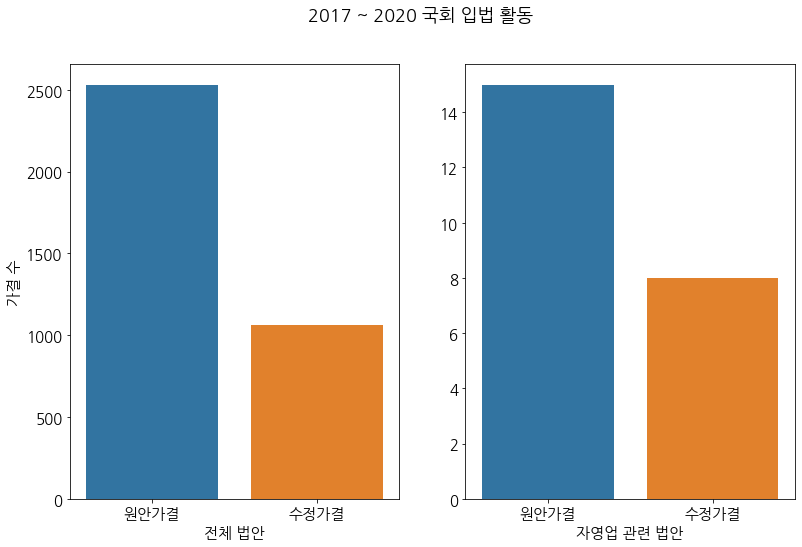

In [ ]:
y1 = [2531.1060]
y2 = [15,8]

plt.figure(figsize=(13,8))

plt.subplot(1,2,1)
plt.suptitle('2017 ~ 2020 국회 입법 활동')
sns.countplot(data2['의결결과'])
plt.xlabel('전체 법안')
plt.ylabel('가결 수')

plt.subplot(1,2,2)
sns.countplot(data4['의결결과'])
plt.xlabel('자영업 관련 법안')
plt.ylabel(' ')
plt.show()

In [34]:
cnt_2 = pd.read_csv('./drive/MyDrive/data/자영업자 수 연,월별.csv', encoding='euc-kr')

In [35]:
cnt_2 = cnt_2.T

In [36]:
cnt_2

,0,1,2,3,4,5,6,7,8,9
종사상지위별,계,비임금근로자,*자영업자,고용원이 있는 자영업자,고용원이 없는 자영업자,무급가족종사자,임금근로자,상용근로자,임시근로자,일용근로자
2017. 01,25878,6486,5524,1595,3928,963,19392,13158,4762,1473
2017. 02,25979,6546,5568,1590,3978,978,19433,13247,4745,1441
2017. 03,26443,6729,5659,1599,4060,1070,19714,13371,4914,1429
2017. 04,26744,6841,5695,1588,4107,1147,19903,13358,5003,1542
2017. 05,26992,6886,5718,1601,4116,1169,20106,13420,5097,1589
2017. 06,27020,6892,5716,1588,4128,1176,20128,13407,5129,1592
2017. 07,27078,6906,5731,1587,4144,1175,20173,13472,5112,1590
2017. 08,26904,6898,5733,1580,4153,1165,20006,13517,5046,1443
2017. 09,27011,6922,5762,1623,4138,1160,20089,13519,5055,1515


In [37]:
cnt_2.rename(columns=cnt_2.iloc[0],inplace=True)
cnt_2 = cnt_2.drop(cnt_2.index[0])

In [40]:
cnt_2.index.name = '날짜'
cnt_2

,계,비임금근로자,*자영업자,고용원이 있는 자영업자,고용원이 없는 자영업자,무급가족종사자,임금근로자,상용근로자,임시근로자,일용근로자
날짜,,,,,,,,,,
2017. 01,25878,6486,5524,1595,3928,963,19392,13158,4762,1473
2017. 02,25979,6546,5568,1590,3978,978,19433,13247,4745,1441
2017. 03,26443,6729,5659,1599,4060,1070,19714,13371,4914,1429
2017. 04,26744,6841,5695,1588,4107,1147,19903,13358,5003,1542
2017. 05,26992,6886,5718,1601,4116,1169,20106,13420,5097,1589
2017. 06,27020,6892,5716,1588,4128,1176,20128,13407,5129,1592
2017. 07,27078,6906,5731,1587,4144,1175,20173,13472,5112,1590
2017. 08,26904,6898,5733,1580,4153,1165,20006,13517,5046,1443
2017. 09,27011,6922,5762,1623,4138,1160,20089,13519,5055,1515


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 45216 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51676 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44228 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 45216 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 51676 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 44228 missing from current font.
  font.set_text

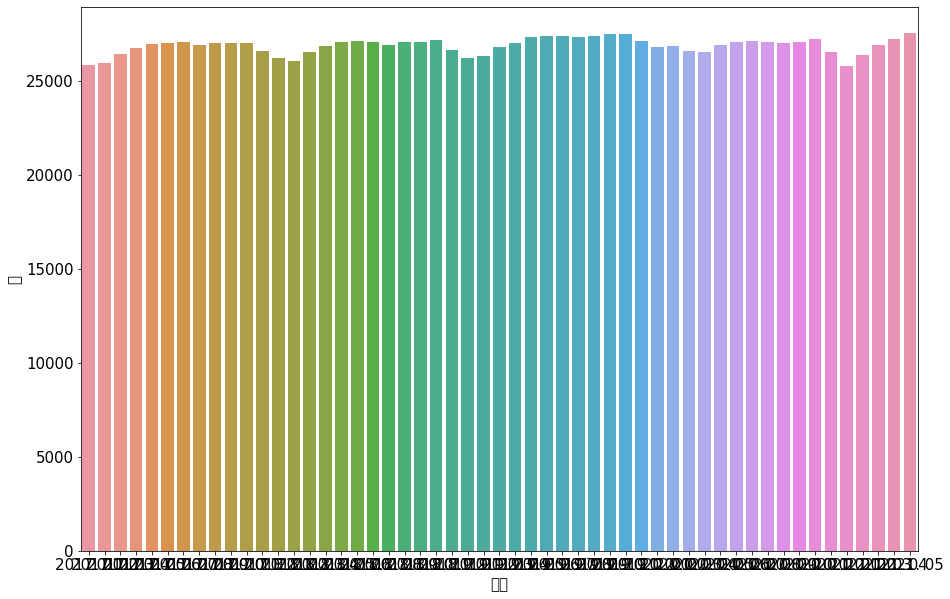

In [52]:
plt.figure(figsize=(15,10))
sns.barplot(x = cnt_2.index, y = cnt_2['계'])
plt.show()